In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

In [4]:
from keras.datasets import cifar10
ci=cifar10.load_data()
dir(ci)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [5]:
(x_train, y_train), (x_test, y_test)= cifar10.load_data()

In [6]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [9]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model=RandomForestClassifier()

In [12]:
model.fit(x_train2,y_train)

RandomForestClassifier()

In [13]:
y_pred=model.predict(x_test2)
y_pred

array([6, 8, 8, ..., 5, 5, 7], dtype=uint8)

In [14]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1038
           1       0.53      0.52      0.52      1028
           2       0.33      0.37      0.35       894
           3       0.28      0.34      0.31       829
           4       0.41      0.40      0.41      1006
           5       0.40      0.44      0.42       896
           6       0.56      0.47      0.51      1187
           7       0.46      0.51      0.48       893
           8       0.61      0.58      0.60      1047
           9       0.55      0.47      0.50      1182

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



In [15]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[557,  35,  98,  47,  53,  34,  14,  58,  97,  45],
       [ 35, 532,  42,  35,  19,  30,  33,  46,  83, 173],
       [ 61,  21, 334,  91, 134,  88,  80,  52,  16,  17],
       [ 24,  32,  82, 283,  59, 164,  66,  59,  29,  31],
       [ 33,  24, 150,  70, 407,  71, 124, 100,  13,  14],
       [ 19,  23,  57, 181,  38, 395,  55,  74,  32,  22],
       [ 21,  44, 115, 134, 149,  84, 557,  39,  14,  30],
       [ 25,  38,  66,  55,  91,  77,  27, 456,  21,  37],
       [164,  60,  28,  26,  23,  26,   6,  22, 611,  81],
       [ 61, 191,  28,  78,  27,  31,  38,  94,  84, 550]], dtype=int64)

Text(69.0, 0.5, 'Truth')

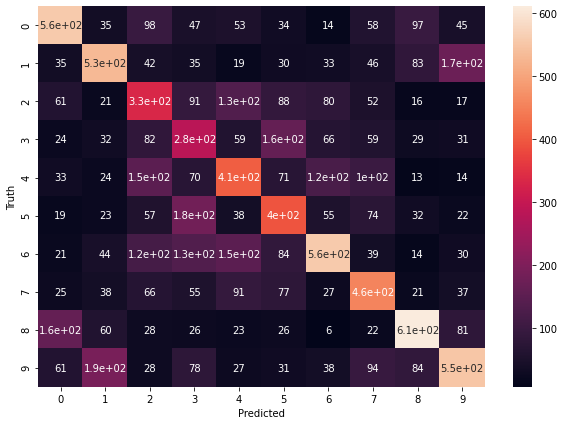

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')